<a href="https://colab.research.google.com/github/ronaldbonfim0-maker/Data-analitycs-portfolio/blob/main/2%C2%B0Pjt_analitcs_myhouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

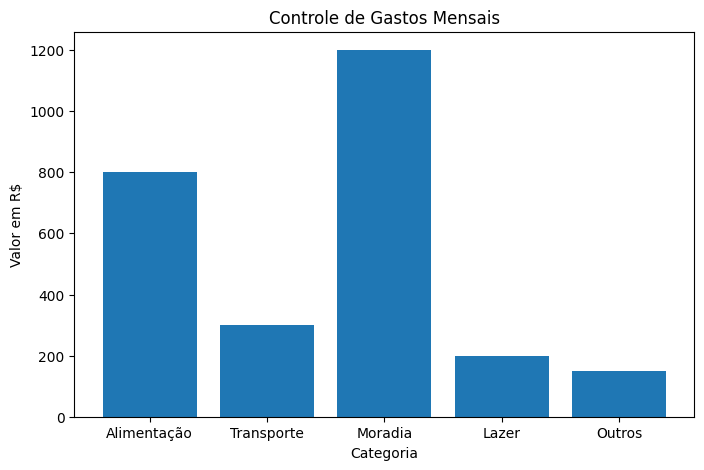

In [ ]:
import matplotlib.pyplot as plt

# Dados de exemplo
categorias = ["Alimentação", "Transporte", "Moradia", "Lazer", "Outros"]
valores = [800, 300, 1200, 200, 150]

# Criando o gráfico
plt.figure(figsize=(8,5))
plt.bar(categorias, valores)

plt.title("Controle de Gastos Mensais")
plt.xlabel("Categoria")
plt.ylabel("Valor em R$")

plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gastos.csv to gastos.csv


In [ ]:
import pandas as pd

dados = pd.read_csv("gastos.csv")
print(dados.head())

     categoria  valor        data
0  Alimentação     45  2026-02-01
1   Transporte     20  2026-02-02
2  Alimentação     30  2026-02-03
3      Moradia    800  2026-02-05
4        Lazer     60  2026-02-07


In [ ]:
dados.describe()

,valor
count,6.000000
mean,163.333333
std,312.244562
min,20.000000
25%,26.250000
50%,37.500000
75%,56.250000
max,800.000000


In [ ]:
dados["valor"].sum()

np.int64(980)

In [ ]:
gastos_categoria = dados.groupby("categoria") ["valor"].sum()
print(gastos_categoria)

categoria
Alimentação     75
Lazer           60
Moradia        800
Outros          25
Transporte      20
Name: valor, dtype: int64


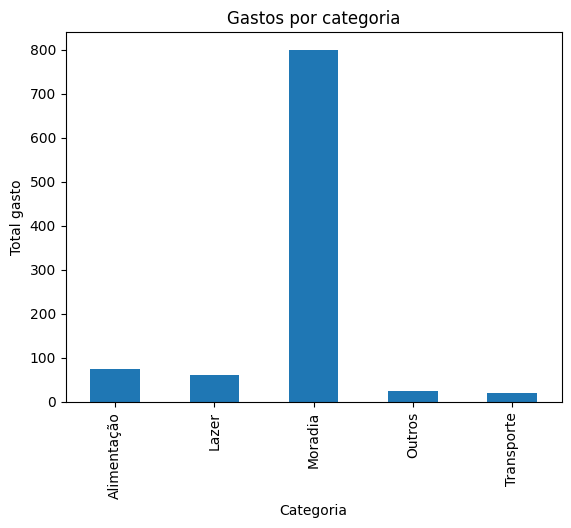

In [ ]:
import matplotlib.pyplot as plt

gastos_categoria.plot(kind="bar")

plt.title("Gastos por categoria")
plt.xlabel("Categoria")
plt.ylabel("Total gasto")
plt.show()

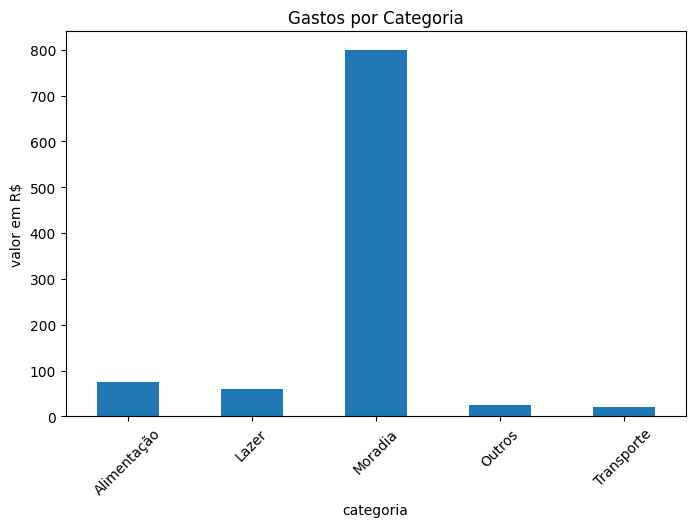

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados
df = pd.read_csv("gastos.csv")

# Agrupar gastos por categoria
gastos_categoria = df.groupby("categoria")["valor"].sum()

# Criar gráfico
plt.figure(figsize=(8,5))
gastos_categoria.plot(kind="bar")

plt.title("Gastos por Categoria")
plt.xlabel("categoria")
plt.ylabel("valor em R$")
plt.xticks(rotation=45)

plt.show()

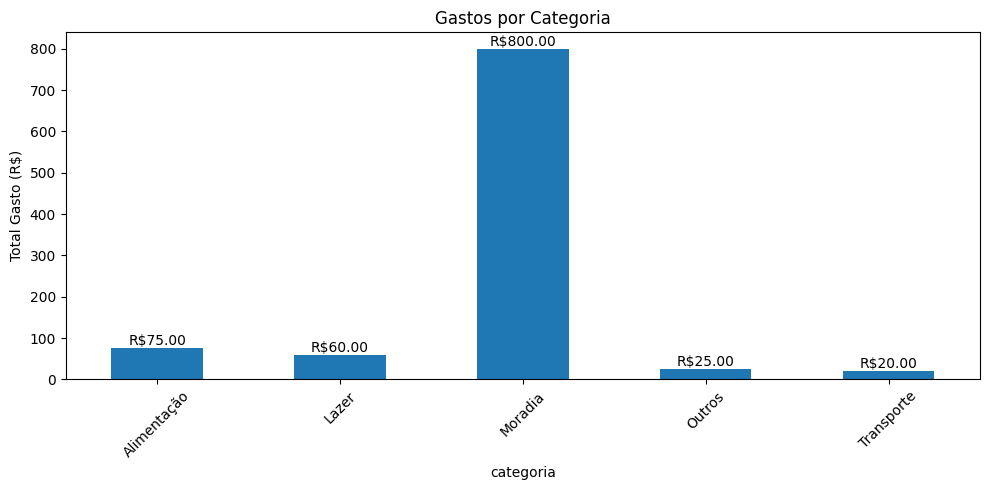

In [ ]:
import matplotlib.pyplot as plt

# Agrupar dados
gastos_categoria = df.groupby("categoria")["valor"].sum()

# Criar gráfico
plt.figure(figsize=(10,5))

gastos_categoria.plot(kind="bar")

plt.title("Gastos por Categoria")
plt.xlabel("categoria")
plt.ylabel("Total Gasto (R$)")

plt.xticks(rotation=45)

# Mostrar valores nas barras
for i, v in enumerate(gastos_categoria):
    plt.text(i, v, f"R${v:.2f}", ha="center", va="bottom")

plt.tight_layout()

plt.show()

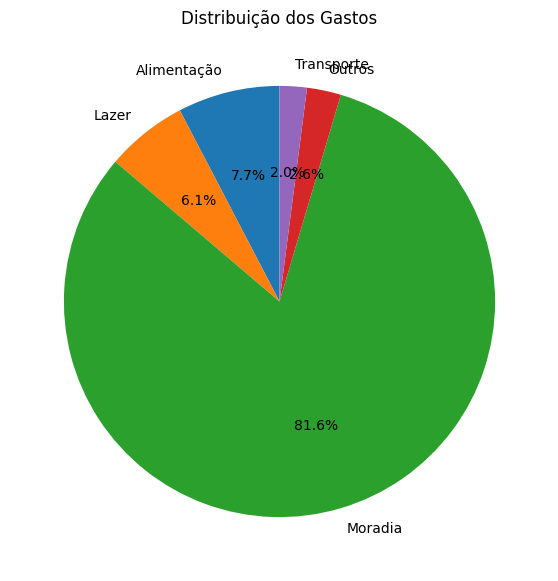

In [ ]:
import matplotlib.pyplot as plt

# Agrupar novamente
gastos_categoria = df.groupby("categoria")["valor"].sum()

plt.figure(figsize=(7,7))

plt.pie(
    gastos_categoria,
    labels=gastos_categoria.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Distribuição dos Gastos")

plt.show()

In [ ]:
total = df["valor"].sum()
print("Total de gastos:", total)

Total de gastos: 980


In [ ]:
df.loc[df["categoria"] == "Transporte", "Valor"] = 300
df.loc[df["categoria"] == "Lazer", "Valor"] = 200
df.loc[df["categoria"] == "Alimentação", "Valor"] = 500
df.loc[df["categoria"] == "Outros", "Valor"] = 100

In [ ]:
gastos_categoria = df.groupby("categoria")["valor"].sum()

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

gastos_categoria = df.groupby("categoria")["Valor"].sum().reset_index()

fig = px.bar(
    gastos_categoria,
    x="categoria",
    y="Valor",
    title="Dashboard de Gastos Pessoais"
)

fig.show()

In [ ]:
import plotly.express as px

gastos_categoria = df.groupby("categoria")["Valor"].sum().reset_index()

fig = px.bar(
    gastos_categoria,
    x="categoria",
    y="Valor",
    color="categoria",
    text="Valor",
    title="Dashboard de Gastos Pessoais",
    template="plotly_dark"
)

fig.update_traces(texttemplate='R$ %{text:.2f}', textposition='outside')

fig.show()

In [ ]:
total = gastos_categoria["Valor"].sum()

gastos_categoria["Porcentagem"] = (gastos_categoria["Valor"] / total) * 100

In [ ]:
fig = px.bar(
    gastos_categoria,
    x="categoria",
    y="Valor",
    color="categoria",
    text="Porcentagem",
    title="Distribuição de Gastos (%)",
    template="plotly_dark"
)

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')

fig.show()

In [ ]:

fig2 = px.pie(
    gastos_categoria,
    values="Valor",
    names="categoria",
    title="Distribuição de Gastos",
    template="plotly_dark"
)

fig2.show()

In [ ]:
import plotly.express as px

gastos_categoria = df.groupby("categoria")["Valor"].sum().reset_index()

total = gastos_categoria["Valor"].sum()
gastos_categoria["Porcentagem"] = (gastos_categoria["Valor"] / total) * 100

fig = px.bar(
    gastos_categoria,
    x="categoria",
    y="Valor",
    color="categoria",
    text="Valor",
    title="Dashboard Financeiro — Controle de Gastos",
    template="plotly_dark"
)

fig.update_traces(texttemplate='R$ %{text:.2f}', textposition='outside')

fig.update_layout(
    title_x=0.5,
    yaxis_title="Valor (R$)",
    xaxis_title="Categoria"
)

fig.show()

In [ ]:
fig2 = px.pie(
    gastos_categoria,
    values="Valor",
    names="categoria",
    title="Distribuição Financeira",
    hole=0.4,
    template="plotly_dark"
)

fig2.update_traces(textinfo='percent+label')

fig2.show()

In [ ]:
categorias = ["Alimentação", "Transporte", "Lazer", "Outros", "Moradia"]

gastos_categoria = df.groupby("categoria")["Valor"].sum().reindex(categorias, fill_value=0).reset_index()

In [ ]:
total = gastos_categoria["Valor"].sum()
gastos_categoria["Porcentagem"] = (gastos_categoria["Valor"] / total) * 100

In [ ]:
import plotly.express as px

fig = px.pie(
    gastos_categoria,
    values="Valor",
    names="categoria",
    hole=0.45,
    title="Distribuição Financeira Completa",
    template="plotly_dark"
)

fig.update_traces(
    textinfo="percent+label+value",
    texttemplate="%{label}<br>%{percent}<br>R$ %{value}"
)

fig.show()

In [ ]:
ranking = gastos_categoria.sort_values(
    by="Valor",
    ascending=False
)

print(ranking)

     categoria   Valor  Porcentagem
0  Alimentação  1000.0        62.50
1   Transporte   300.0        18.75
2        Lazer   200.0        12.50
3       Outros   100.0         6.25
4      Moradia     0.0         0.00


In [ ]:
import plotly.express as px

fig = px.bar(
    ranking,
    x="categoria",
    y="Valor",
    color="categoria",
    text="Valor",
    title="Ranking de Gastos",
    template="plotly_dark"
)

fig.update_traces(texttemplate='R$ %{text:.2f}', textposition='outside')

fig.show()

In [ ]:
fig2 = px.pie(
    gastos_categoria,
    values="Valor",
    names="categoria",
    title="Distribuição Financeira",
    hole=0.45,
    template="plotly_dark"
)

fig2.update_traces(
    textinfo="percent+label"
)

fig2.show()

In [ ]:
import pandas as pd
import plotly.express as px

dados_casa = pd.DataFrame({
    "Lugar": ["Quarto", "Cozinha", "Sala", "Banheiro"],
    "X": [4, 6, 4, 4],
    "Y": [8, 7, 6, 8],
    "Frequencia": [40, 30, 50, 15]
})

fig = px.scatter(
    dados_casa,
    x="X",
    y="Y",
    size="Frequencia",
    color="Lugar",
    title="Mapa de Frequência na Casa",
    template="plotly_dark"
)

fig.show()

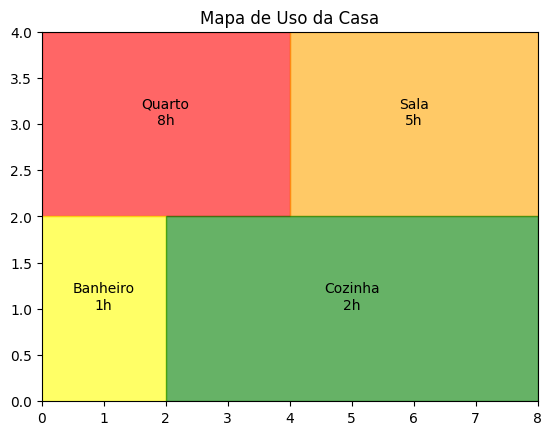

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Criar ambientes da casa
ax.add_patch(plt.Rectangle((0,2),4,2,color='red',alpha=0.6))
ax.text(2,3,"Quarto\n8h",ha='center')

ax.add_patch(plt.Rectangle((4,2),4,2,color='orange',alpha=0.6))
ax.text(6,3,"Sala\n5h",ha='center')

ax.add_patch(plt.Rectangle((0,0),2,2,color='yellow',alpha=0.6))
ax.text(1,1,"Banheiro\n1h",ha='center')

ax.add_patch(plt.Rectangle((2,0),6,2,color='green',alpha=0.6))
ax.text(5,1,"Cozinha\n2h",ha='center')

plt.title("Mapa de Uso da Casa")
plt.xlim(0,8)
plt.ylim(0,4)
plt.show()

In [ ]:
import pandas as pd

dados = {
    "ambiente": [
        "Sala", "Sala", "Cozinha", "Cozinha", "Quarto", "Quarto",
        "Banheiro", "Sala", "Cozinha", "Quarto"
    ],
    "hora": [
        8, 9, 9, 12, 13, 22, 7, 18, 19, 23
    ],
    "tempo_minutos": [
        30, 40, 20, 45, 120, 480, 10, 60, 35, 420
    ]
}

df_movimento = pd.DataFrame(dados)

df_movimento.to_csv("Movimento_casa.csv", index=False)

df_movimento

,ambiente,hora,tempo_minutos
0,Sala,8,30
1,Sala,9,40
2,Cozinha,9,20
3,Cozinha,12,45
4,Quarto,13,120
5,Quarto,22,480
6,Banheiro,7,10
7,Sala,18,60
8,Cozinha,19,35
9,Quarto,23,420


In [ ]:
import os
os.listdir()

['.config', 'drive', 'Movimento_casa.csv', 'gastos.csv', 'sample_data']

In [ ]:
df = pd.read_csv("Movimento_casa.csv")

In [ ]:
tempo_por_ambiente = df.groupby("ambiente")["tempo_minutos"].sum()

tempo_por_ambiente

,tempo_minutos
ambiente,
Banheiro,10
Cozinha,100
Quarto,1020
Sala,130


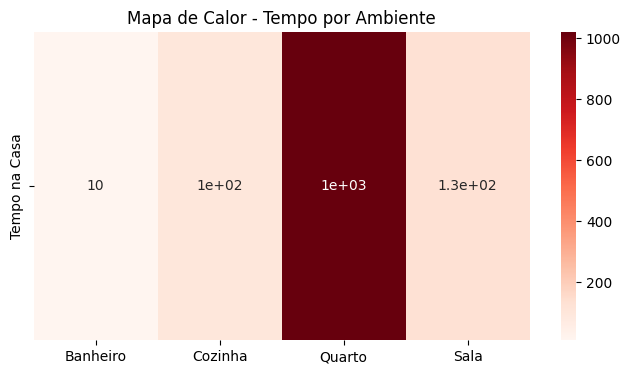

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ambientes = tempo_por_ambiente.index
tempos = tempo_por_ambiente.values

plt.figure(figsize=(8,4))

sns.heatmap([tempos],
            annot=True,
            xticklabels=ambientes,
            yticklabels=["Tempo na Casa"],
            cmap="Reds")

plt.title("Mapa de Calor - Tempo por Ambiente")
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv("Movimento_casa.csv")

df

,ambiente,hora,tempo_minutos
0,Sala,8,30
1,Sala,9,40
2,Cozinha,9,20
3,Cozinha,12,45
4,Quarto,13,120
5,Quarto,22,480
6,Banheiro,7,10
7,Sala,18,60
8,Cozinha,19,35
9,Quarto,23,420


In [ ]:
tempo_por_ambiente = df.groupby("ambiente")["tempo_minutos"].sum()

movimento_por_hora = df.groupby("hora")["tempo_minutos"].sum()

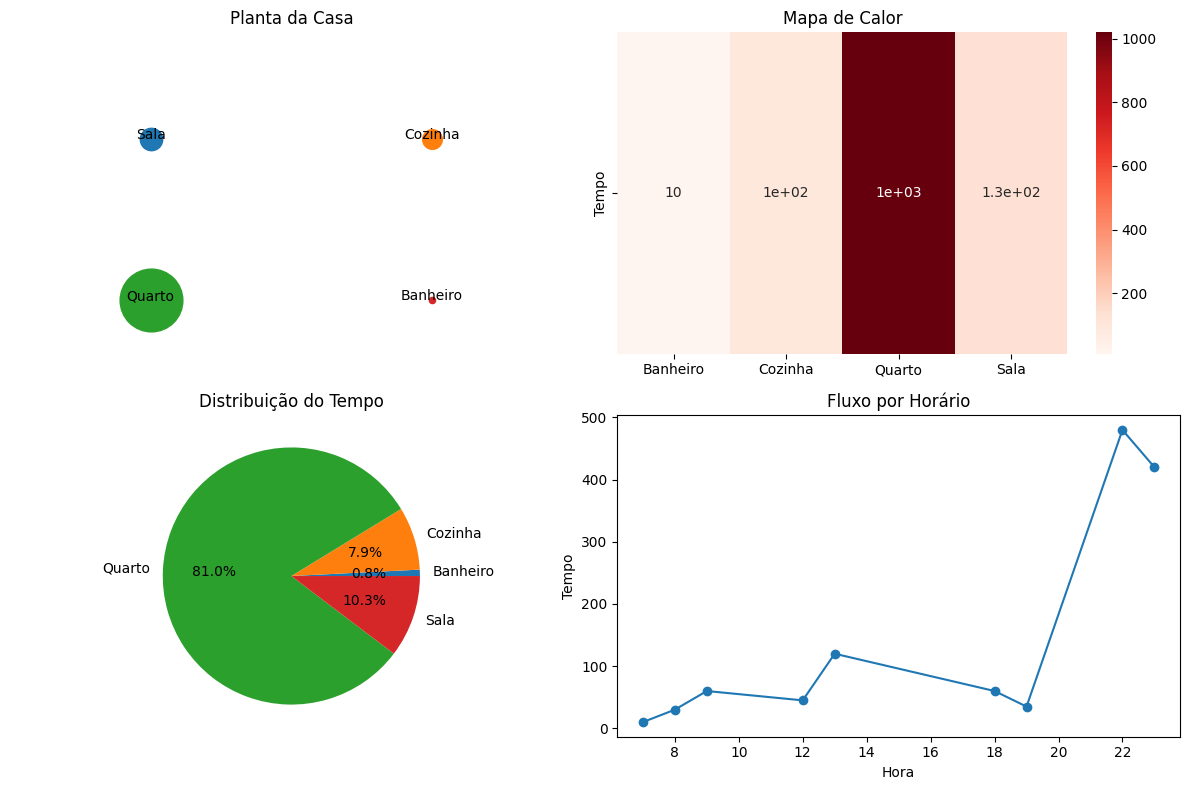

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2,2, figsize=(12,8))

# =========================
# 1️⃣ Planta da casa
# =========================

axes[0,0].set_title("Planta da Casa")

casa = {
    "Sala":(1,2),
    "Cozinha":(3,2),
    "Quarto":(1,0.5),
    "Banheiro":(3,0.5)
}

for ambiente,(x,y) in casa.items():

    tempo = tempo_por_ambiente.get(ambiente,0)

    axes[0,0].scatter(x,y,s=tempo*2)
    axes[0,0].text(x,y,ambiente,ha='center')

axes[0,0].set_xlim(0,4)
axes[0,0].set_ylim(0,3)

axes[0,0].axis("off")

# =========================
# 2️⃣ Heatmap de tempo
# =========================

sns.heatmap([tempo_por_ambiente.values],
            annot=True,
            xticklabels=tempo_por_ambiente.index,
            yticklabels=["Tempo"],
            cmap="Reds",
            ax=axes[0,1])

axes[0,1].set_title("Mapa de Calor")

# =========================
# 3️⃣ Pizza
# =========================

axes[1,0].pie(tempo_por_ambiente,
              labels=tempo_por_ambiente.index,
              autopct="%1.1f%%")

axes[1,0].set_title("Distribuição do Tempo")

# =========================
# 4️⃣ Fluxo por hora
# =========================

axes[1,1].plot(movimento_por_hora.index,
               movimento_por_hora.values,
               marker="o")

axes[1,1].set_title("Fluxo por Horário")
axes[1,1].set_xlabel("Hora")
axes[1,1].set_ylabel("Tempo")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

dados = {
    "hora":[8,9,10,11,12,13,14],
    "ambiente":["Sala","Cozinha","Sala","Quarto","Cozinha","Banheiro","Sala"],
    "x":[1,3,1,1,3,3,1],
    "y":[2,2,2,0.5,2,0.5,2],
    "tempo":[15,10,20,30,10,5,25]
}

df = pd.DataFrame(dados)

df.to_csv("movimento_casa.csv", index=False)

df

,hora,ambiente,x,y,tempo
0,8,Sala,1,2.0,15
1,9,Cozinha,3,2.0,10
2,10,Sala,1,2.0,20
3,11,Quarto,1,0.5,30
4,12,Cozinha,3,2.0,10
5,13,Banheiro,3,0.5,5
6,14,Sala,1,2.0,25


In [ ]:
import os
os.listdir()

['.config',
 'drive',
 'movimento_casa.csv',
 'Movimento_casa.csv',
 'gastos.csv',
 'sample_data']

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("movimento_casa.csv")

fig = px.line(
    df,
    x="x",
    y="y",
    text="ambiente",
    markers=True,
    title="Trajetória de Movimento na Casa"
)

fig.update_traces(textposition="top center")

fig.update_layout(
    xaxis_title="Planta X",
    yaxis_title="Planta Y",
)

fig.show()

In [ ]:
fig = px.scatter(
    df,
    x="x",
    y="y",
    animation_frame="hora",
    size="tempo",
    color="ambiente",
    title="Movimento pela Casa ao Longo do Dia"
)

fig.show()

In [ ]:
import pandas as pd

dados = {
    "hora":[8,9,10,11,12,13,14],
    "ambiente":["Sala","Cozinha","Sala","Quarto","Cozinha","Banheiro","Sala"],
    "x":[1,3,1,1,3,3,1],
    "y":[2,2,2,0.5,2,0.5,2],
    "tempo":[15,10,20,30,10,5,25]
}

df = pd.DataFrame(dados)

df

,hora,ambiente,x,y,tempo
0,8,Sala,1,2.0,15
1,9,Cozinha,3,2.0,10
2,10,Sala,1,2.0,20
3,11,Quarto,1,0.5,30
4,12,Cozinha,3,2.0,10
5,13,Banheiro,3,0.5,5
6,14,Sala,1,2.0,25


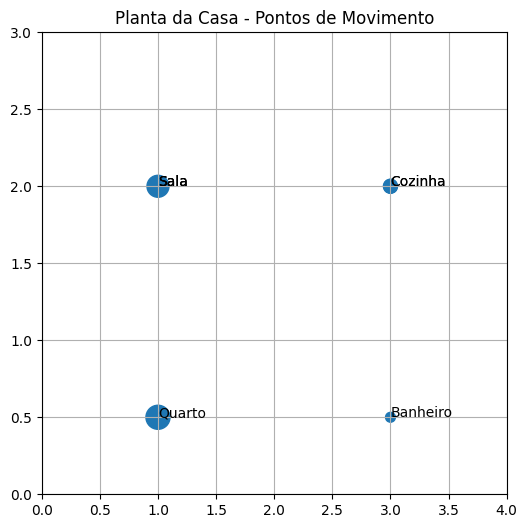

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

plt.scatter(df["x"], df["y"], s=df["tempo"]*10)

for i in range(len(df)):
    plt.text(df["x"][i], df["y"][i], df["ambiente"][i])

plt.title("Planta da Casa - Pontos de Movimento")

plt.xlim(0,4)
plt.ylim(0,3)

plt.grid()

plt.show()

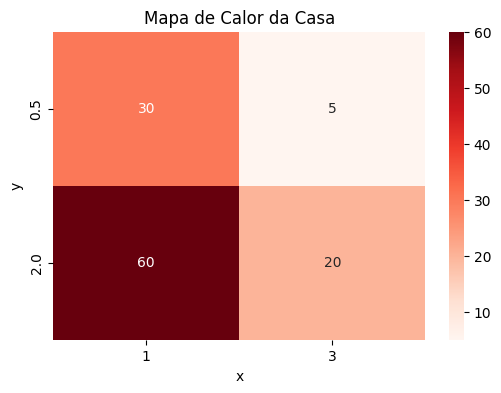

In [ ]:
import seaborn as sns

pivot = df.pivot_table(
    values="tempo",
    index="y",
    columns="x",
    aggfunc="sum"
)

plt.figure(figsize=(6,4))

sns.heatmap(
    pivot,
    cmap="Reds",
    annot=True
)

plt.title("Mapa de Calor da Casa")

plt.show()

In [ ]:
import plotly.express as px

fig = px.line(
    df,
    x="x",
    y="y",
    markers=True,
    text="ambiente",
    title="Trajetória de Movimento"
)

fig.show()

In [ ]:
fig = px.scatter(
    df,
    x="x",
    y="y",
    animation_frame="hora",
    size="tempo",
    color="ambiente",
    title="Movimento ao Longo do Dia"
)

fig.show()

In [ ]:
import pandas as pd

dados = {
    "ambiente":["Sala","Cozinha","Quarto","Banheiro"],
    "tempo":[120,80,300,40],
    "x":[1,3,1,3],
    "y":[2,2,0.5,0.5]
}

df = pd.DataFrame(dados)

df

,ambiente,tempo,x,y
0,Sala,120,1,2.0
1,Cozinha,80,3,2.0
2,Quarto,300,1,0.5
3,Banheiro,40,3,0.5


In [ ]:
import plotly.express as px

fig_pizza = px.pie(
    df,
    values="tempo",
    names="ambiente",
    title="Distribuição de Tempo por Ambiente"
)

fig_pizza.show()

In [ ]:
fig_planta = px.scatter(
    df,
    x="x",
    y="y",
    size="tempo",
    text="ambiente",
    title="Planta da Casa"
)

fig_planta.update_traces(textposition="top center")

fig_planta.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=1,
    cols=2,
    specs=[[{"type":"domain"},{"type":"xy"}]]
)

fig.add_trace(
    go.Pie(labels=df["ambiente"], values=df["tempo"]),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df["x"],
        y=df["y"],
        mode="markers+text",
        text=df["ambiente"],
        marker=dict(size=df["tempo"])
    ),
    row=1, col=2
)

fig.update_layout(title="Dashboard de Uso da Casa")

fig.show()